Libraries

In [108]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
from matplotlib import pyplot as plt

# Tabular data display
from prettytable import PrettyTable

# Machine learning and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


Functions

In [54]:
def headPlotter(dataframe, num_rows=5):
    # Example usage:
    # Replace 'df' with your DataFrame and specify the number of rows you want to display
    # headPlotter(df, num_rows=5)
    # Create a pretty table
    table = PrettyTable()

    # Add a "Row" column as the first column to represent row numbers
    table.field_names = ["Row"] + dataframe.columns.tolist()

    # Add rows to the table from the DataFrame with row numbers
    for row_num, row in enumerate(dataframe.head(num_rows).itertuples(index=False), start=1):
        table.add_row([row_num] + list(row))

    # Convert the table to a string
    table_str = str(table)

    # Create a plot to display the table
    plt.figure(figsize=(10, 3))
    plt.axis('off')  # Hide the axis
    plt.text(0.1, 0.1, table_str, fontsize=10, family='monospace')
    plt.show()



Load Dataset

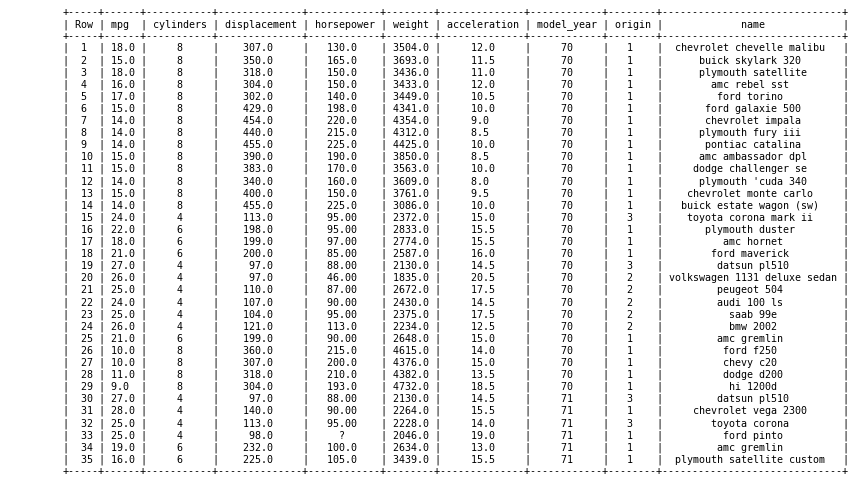

In [55]:
import pandas as pd

# Replace 'your_file_path' with the actual path to your "auto-mpg.data" file
file_path = 'auto-mpg.data'

# Define column names for your dataset if they are not included in the file
# You can adjust these column names according to your dataset
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "name"]

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(file_path, delim_whitespace=True, names=column_names)
# print the head of df
headPlotter(df, num_rows=35)

Investigate the Dataset

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [57]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [58]:
# Assuming you have loaded your dataset into the 'df' DataFrame

# Count the rows where any attribute contains '?'
count_question_mark = (df == '?').any(axis=1).sum()

print(f"Number of rows with '?' in any attribute: {count_question_mark}")


Number of rows with '?' in any attribute: 6


Data processing

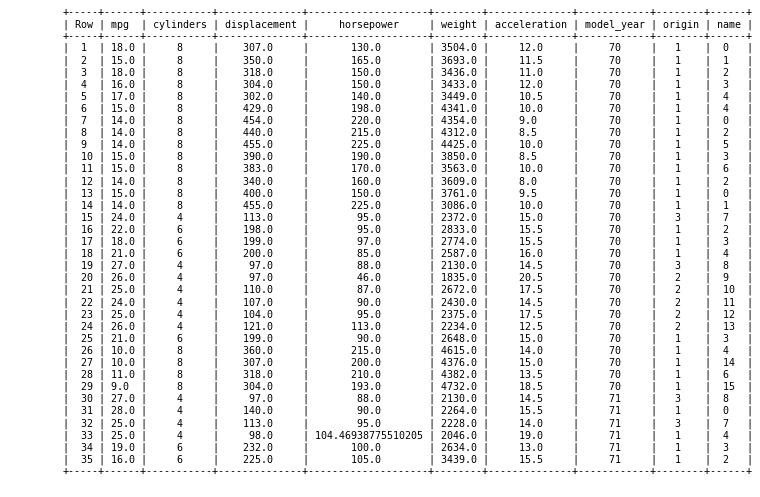

In [59]:
# Split the "name" attribute on whitespace and keep only the first word
df['name'] = df['name'].str.split().str.get(0)
# Now, the "name" attribute in  DataFrame contains only the first word
# Assuming you have loaded dataset into the 'df' DataFrame

# Assuming you have loaded your dataset into the 'df' DataFrame

# Define the columns with numerical data that you want to impute
numerical_columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin"]

# Replace '?' with NaN to facilitate imputation
df[numerical_columns] = df[numerical_columns].replace('?', np.nan)

# Convert the columns to numeric data types
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric)

# Impute missing values with the mean of their respective columns
df.fillna(df.mean(numeric_only=True), inplace=True)

# Now, the '?' values in the specified columns have been replaced with the mean value.

# Assuming you have loaded your dataset into the 'df' DataFrame

# Extract all unique values from the "name" attribute
unique_names = df['name'].unique()

# Create a mapping from unique names to numerical values
name_to_numerical_mapping = {name: idx for idx, name in enumerate(unique_names)}

# Replace the values in the "name" attribute using the mapping
df['name'] = df['name'].map(name_to_numerical_mapping)

# Now, the "name" attribute contains numerical values based on the mapping.
# print the head of df
headPlotter(df, num_rows=35)

In [62]:
# Split the DataFrame into training and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# 'train_df' contains 80% of the data, and 'test_df' contains 20% of the data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 3 to 102
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           318 non-null    float64
 1   cylinders     318 non-null    int64  
 2   displacement  318 non-null    float64
 3   horsepower    318 non-null    float64
 4   weight        318 non-null    float64
 5   acceleration  318 non-null    float64
 6   model_year    318 non-null    int64  
 7   origin        318 non-null    int64  
 8   name          318 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 24.8 KB


In [67]:
# # Set the target variable as the first column
# target_variable = df.columns[0]

# # Create a pair plot with respect to the target variable
# sns.pairplot(data=train_df, hue=target_variable, palette='viridis')
# plt.show()

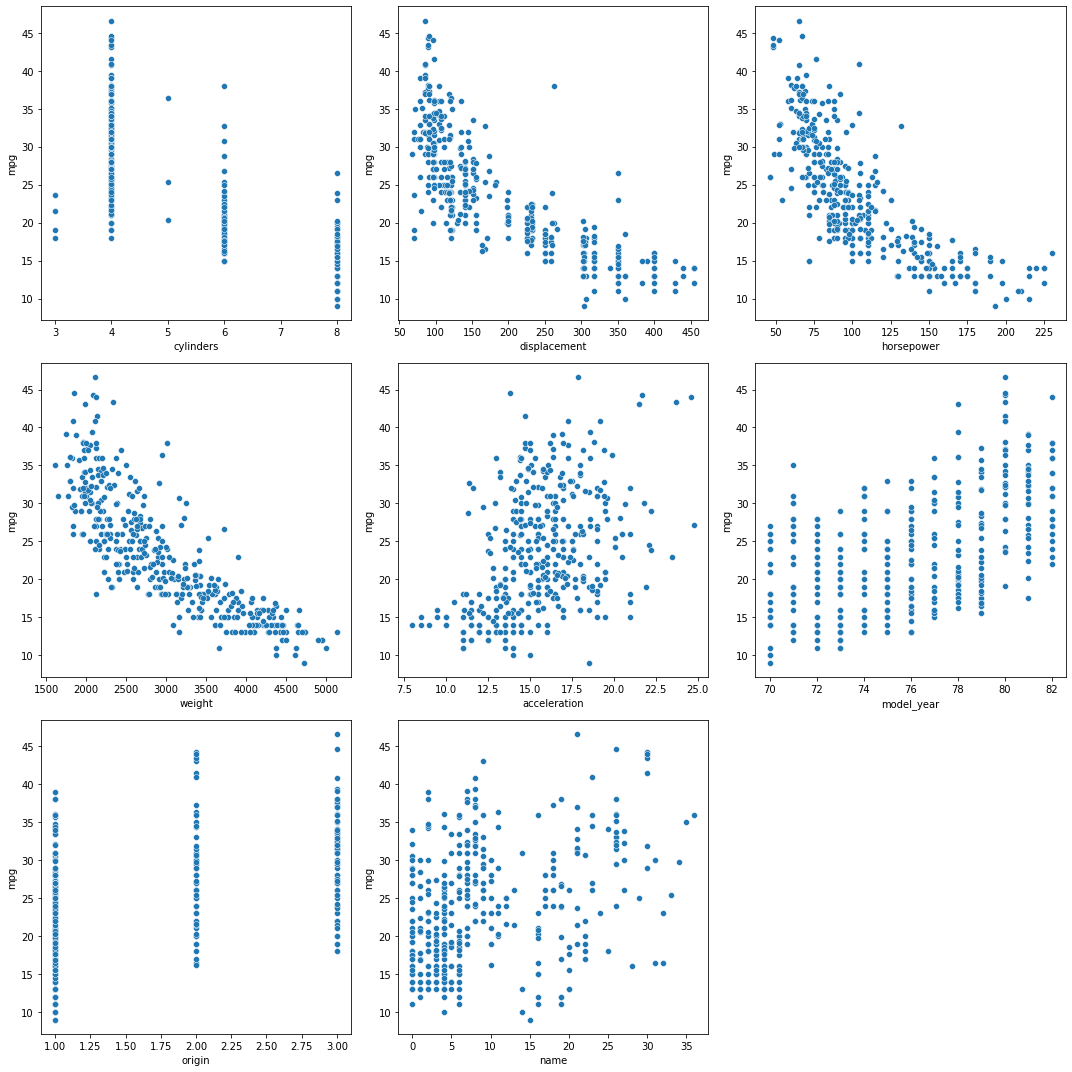

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your dataset in the 'df' DataFrame

# Set the target variable as the first column
target_variable = df.columns[0]

# Get a list of all attributes (excluding the target variable)
attributes = df.columns[1:]

# Determine the number of rows and columns for subplots
n_attributes = len(attributes)
n_rows = n_attributes // 3 + (n_attributes % 3 > 0)  # 3 attributes per row

# Create subplots
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create individual scatter plots for each attribute
for i, attribute_to_plot in enumerate(attributes):
    ax = axes[i]
    sns.scatterplot(data=df, x=attribute_to_plot, y=target_variable, ax=ax)
    ax.set_xlabel(attribute_to_plot)
    ax.set_ylabel(target_variable)
    
# Remove any unused subplots
for i in range(n_attributes, n_rows * 3):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


**Cylinder Plot:**
For cylinder count, there is a clear linear relationship with an increase in the number of cylinders. In other words, as the number of cylinders increases, more fuel is consumed, meaning that the vehicle can cover fewer miles per gallon of fuel.

**Plot - Displacement:**
Engine displacement is a measure of the engine's size, providing an indication of its power and performance characteristics. Larger engine displacements often indicate more powerful engines, but they may also consume more fuel. A decreasing exponential trend is observed.

**Horsepower Plot:**
Horsepower is a crucial factor when evaluating a car's performance and fuel efficiency. Generally, cars with more horsepower can accelerate faster and handle heavier loads, but they may also consume more fuel. Fuel efficiency, measured by MPG, is essential for many car buyers, as it shows how far a car can travel on a gallon of fuel. Higher MPG values indicate better fuel efficiency, a desirable characteristic for those looking to save on fuel costs and reduce their environmental impact. It follows a decreasing exponential trend similar to the previous plot.

**Weight Plot:**
A car's weight significantly impacts its fuel efficiency (MPG). Heavier vehicles typically have lower fuel efficiency as they require more energy to move, leading to increased fuel consumption. In contrast, lighter cars usually exhibit better fuel efficiency because they require less energy to operate. This behavior is similar to the previous plots and follows a decreasing exponential trend.

**Acceleration Plot:**
Acceleration is an essential factor in assessing MPG because a driver's acceleration style significantly affects fuel efficiency. Rapid or aggressive acceleration generally leads to increased fuel consumption as it demands more power from the engine to achieve higher speeds quickly. On the other hand, smooth and gradual acceleration tends to be more fuel-efficient, and this behavior is nonlinear.

**Model Year Plot:**
The model year is relevant in the context of car MPG as fuel efficiency standards and technologies may change from one model year to the next. Automakers frequently make updates and enhancements to their vehicles to improve fuel efficiency, safety, and other features. Consequently, the MPG rating for a car may vary from one model year to another, even if the make and model name remains the same. This behavior follows a linear trend.

**Origin Plot:**
The country of origin can be significant for some car buyers due to various reasons, such as the automaker's reputation, quality control, labor standards, and trade agreements. Some buyers may prefer cars made in countries known for high-quality manufacturing, or they may choose to support domestic or locally produced vehicles. This behavior follows a linear trend.

**Name Plot:**
The behavior here is nonlinear. It's worth noting that different car manufacturers produce vehicles with varying fuel consumption patterns.


Train Model

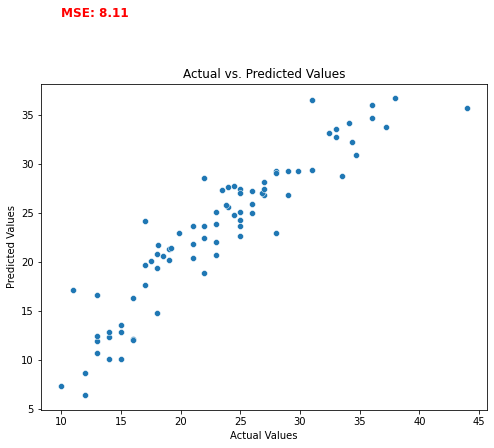

In [78]:
# Set the target variable as the first column in both train and test sets
target_variable = train_df.columns[0]

# Extract the input features (exclude the target variable) from both train and test sets
X_train = train_df.drop(columns=[target_variable])
X_test = test_df.drop(columns=[target_variable])

# Extract the target variable from both train and test sets
y_train = train_df[target_variable]
y_test = test_df[target_variable]

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Create a DataFrame to contain both y_test and y_pred
result_df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred})

# Plot predicted values vs. actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(data=result_df, x='Actual Values', y='Predicted Values')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Print MSE in bold font on the plot
plt.text(10, 45, f'MSE: {mse:.2f}', fontsize=12, fontweight='bold', color='red')

plt.show()


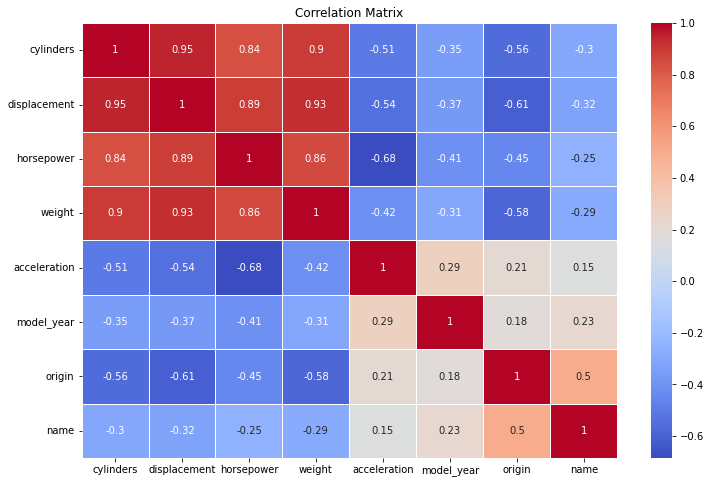

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is in the 'df' DataFrame

# Exclude the first column (target variable) from the correlation matrix
correlation_matrix = df.iloc[:, 1:].corr()

# Set the plot size
plt.figure(figsize=(12, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add a title to the plot
plt.title('Correlation Matrix')

# Display the plot
plt.show()



Feature Selection

# Feature Selection Based on Dependency Matrix

Considering the dependency matrix of the selected features, which include 'displacement,' 'weight,' 'cylinders,' 'model_year,' 'horsepower,' 'acceleration,' 'name,' and 'origin,' we can confidently make our feature choices.

First, among the top features, 'cylinders' stands out as a significant feature with a clear impact on the analysis.

If we aim to include one more feature from this set, 'weight' is a sensible choice due to its relevance and impact on our analysis, especially when considered alongside 'displacement' and the remaining features.

It's worth noting that all the other features among the remaining four ('model_year,' 'horsepower,' 'acceleration,' and 'origin') are also valuable and can contribute effectively to our analysis. Therefore, using the complete set of selected features seems to be a beneficial approach for our analysis

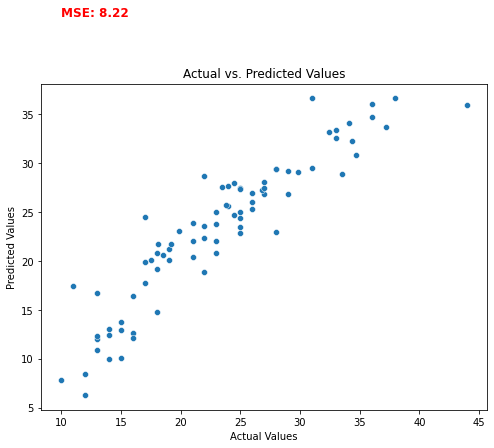

In [107]:
# Specify the selected features
target_variable = train_df.columns[0]
selected_features = ['displacement','weight','model_year','acceleration', "origin", "name"]
# ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "name"]

# Extract the selected features from the training and test sets
X_train = train_df[selected_features]
X_test = test_df[selected_features]

# Extract the target variable from the training and test sets
y_train = train_df[target_variable]  # Replace 'target_variable_name' with the actual name of your target variable
y_test = test_df[target_variable]  # Replace 'target_variable_name' with the actual name of your target variable

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Create a DataFrame to contain both y_test and y_pred
result_df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred})

# Plot predicted values vs. actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(data=result_df, x='Actual Values', y='Predicted Values')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Print MSE in bold font on the plot
plt.text(10, 45, f'MSE: {mse:.2f}', fontsize=12, fontweight='bold', color='red')

plt.show()



Considering the strong correlation between 'cylinders' and 'horsepower' and the fact that 'displacement' can potentially encompass all the mentioned features while providing additional information, it can be selected to replace all of them. Furthermore, it is evident that the vehicle's weight is directly and logically related to the manufacturer's choices of the above features. Even though weight also contains additional information beyond the initial four features, so far, two features, 'displacement' and 'weight,' appear suitable for regression.

From the other four features, chosen based on their graphs indicating miles per gallon, we include all four. This decision is made because they have lower self-correlation and differ from the first four features. However, it's worth noting that these features are considered of lesser importance based on the initial plots.

"It can be observed that by removing these two features, there is no significant drop in the Mean Squared Error (MSE). Therefore, it can be inferred that the information from the eliminated features is already present in the first two features. However, if we remove the 'weight' feature, the MSE increases to 11, which is a noticeable change. Thus, we have decided to retain these features in accordance with the question's requirements.

Although we could have removed the 'car name' feature and still maintained an MSE of approximately 8.3, we chose to keep them as per the question's instructions.